# Name of Student : Aagam Manish Shah

# USC ID Number : 8791018480

# 5.1 Multi-class and Multi-Label Classification Using Support Vector Machines

In [1]:
import csv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import ClassifierChain
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import jaccard_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_recall_fscore_support as score
import itertools
import warnings
from sklearn.preprocessing import label_binarize

## (a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.

In [2]:
Input_data = pd.read_csv(r'Frogs_MFCCs.csv')
Input_data

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [3]:
X_data = Input_data.iloc[:,0:22]
y_data = Input_data.iloc[:,22:25]

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=2333)

## (b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-class classification is to train a classifier for each label. We first try this approach:

### i. Research exact match and hamming score/ loss methods for evaluating multi-label classification and use them in evaluating the classifiers in this problem.

Sklearn libraries have metrics package (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). This package has metrics.accuracy_score(y_true, y_pred) which can be used to evaluate multilabel classification issues in an exact match way. This package also has metrics.hamming_loss(y_true, y_pred) which could be used to compute the average Hamming loss. 

### ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both standardized and raw attributes and report the results. 

In [5]:
LABELS_NAME = ["Family", "Genus", "Species"]

In [6]:
def Standard_SVC():
    return Pipeline([("standardize", StandardScaler()),("svc", SVC(kernel="rbf", decision_function_shape='ovr'))])

In [7]:
SVC_Parameters = {"gamma": np.logspace(-9, 3, 10), "C": np.logspace(-2, 5, 10)}
std_SVC_Parameters = {"svc__gamma": np.logspace(-9, 3, 10), "svc__C": np.logspace(-2, 5, 10)}

for label_index in range(Y_train.shape[1]):
    y_train = Y_train.iloc[:, label_index]
    y_test = Y_test.iloc[:, label_index]

    svc = SVC(kernel="rbf", decision_function_shape='ovr')
    std_SVC = Standard_SVC()
    grid_CV = GridSearchCV(svc, SVC_Parameters, cv=10, n_jobs=-1)
    std_Grid_CV = GridSearchCV(std_SVC, std_SVC_Parameters, cv=10, n_jobs=-1)

    grid_CV.fit(X_train, y_train)
    std_Grid_CV.fit(X_train, y_train)

    best_Clf = grid_CV.best_estimator_
    best_std_Clf = std_Grid_CV.best_estimator_

    y_predict = best_Clf.predict(X_test)
    y_std_predict = best_std_Clf.predict(StandardScaler().fit(X_test).transform(X_test))

    print("-------------------------" + LABELS_NAME[label_index] + "---------------------------")
    print("Using Raw Data, The best parameters are: ", grid_CV.best_params_)
    print("Using Standardized Data, The best parameters are: ", std_Grid_CV.best_params_)

    print("Using Raw Data, The accuracy score is: ", accuracy_score(y_test, y_predict))
    print("Using Standardized Data, The accuracy score is: ", accuracy_score(y_test, y_std_predict))

    print("Using Raw Data, The hamming loss is: ", hamming_loss(y_test, y_predict))
    print("Using Standardized Data, The hamming loss is: ", hamming_loss(y_test, y_std_predict))

-------------------------Family---------------------------
Using Raw Data, The best parameters are:  {'C': 12.91549665014884, 'gamma': 2.154434690031878}
Using Standardized Data, The best parameters are:  {'svc__C': 12.91549665014884, 'svc__gamma': 0.1}
Using Raw Data, The accuracy score is:  0.9902732746641963
Using Standardized Data, The accuracy score is:  0.301991662806855
Using Raw Data, The hamming loss is:  0.009726725335803613
Using Standardized Data, The hamming loss is:  0.6980083371931449
-------------------------Genus---------------------------
Using Raw Data, The best parameters are:  {'C': 12.91549665014884, 'gamma': 2.154434690031878}
Using Standardized Data, The best parameters are:  {'svc__C': 2.1544346900318843, 'svc__gamma': 0.1}
Using Raw Data, The accuracy score is:  0.9874942102825383
Using Standardized Data, The accuracy score is:  0.221861973135711
Using Raw Data, The hamming loss is:  0.012505789717461788
Using Standardized Data, The hamming loss is:  0.7781380

### iii. Repeat 1(b)ii with L1-penalized SVMs. Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.

In [8]:
warnings.filterwarnings("ignore")

In [9]:
def linear_std_SVC():
    return Pipeline([("standardize", StandardScaler()),("svc", LinearSVC(penalty="l1", multi_class='ovr', dual=False))])

In [10]:
linear_svc_parameters = {"svc__tol": [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8], "svc__C": np.logspace(-2, 5, 10)}

for label_index in range(Y_train.shape[1]):
    y_train = Y_train.iloc[:, label_index]
    y_test = Y_test.iloc[:, label_index]
    
    linear_std_svc = linear_std_SVC()
    
    grid_CV = GridSearchCV(linear_std_svc, linear_svc_parameters, cv=10, n_jobs=-1)
    
    grid_CV.fit(X_train, y_train)
    
    best_Clf = grid_CV.best_estimator_
    
    y_predict = best_Clf.predict(X_test)
    
    print("-------------------------" + LABELS_NAME[label_index] + "---------------------------")
    
    print("Using L1 penalized SVM, The best parameters are: ", grid_CV.best_params_)

    print("Using L1 penalized SVM, The accuracy score is: ", accuracy_score(y_test, y_predict))

    print("Using L1 penalized SVM, The hamming loss is: ", hamming_loss(y_test, y_predict))

-------------------------Family---------------------------
Using L1 penalized SVM, The best parameters are:  {'svc__C': 0.35938136638046275, 'svc__tol': 1e-07}
Using L1 penalized SVM, The accuracy score is:  0.9295970356646596
Using L1 penalized SVM, The hamming loss is:  0.07040296433534043
-------------------------Genus---------------------------
Using L1 penalized SVM, The best parameters are:  {'svc__C': 464.1588833612782, 'svc__tol': 0.0001}
Using L1 penalized SVM, The accuracy score is:  0.9481241315423807
Using L1 penalized SVM, The hamming loss is:  0.05187586845761927
-------------------------Species---------------------------
Using L1 penalized SVM, The best parameters are:  {'svc__C': 0.35938136638046275, 'svc__tol': 0.001}
Using L1 penalized SVM, The accuracy score is:  0.9499768411301528
Using L1 penalized SVM, The hamming loss is:  0.05002315886984715


### iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [11]:
warnings.filterwarnings("ignore")

In [12]:
linear_svc_parameters = {"svc__tol": [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8], "svc__C": np.logspace(-2, 5, 10)}

for label_index in range(Y_train.shape[1]):
    y_train = Y_train.iloc[:, label_index]
    y_test = Y_test.iloc[:, label_index]
    
    smote = SMOTE(random_state=2333)
    X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)
    X_test_smote, y_test_smote = smote.fit_sample(X_test, y_test)
    
    linear_std_svc = linear_std_SVC()
    
    grid_CV = GridSearchCV(linear_std_svc, linear_svc_parameters, cv=10, n_jobs=-1)
    
    grid_CV.fit(X_train_smote, y_train_smote)
    

    best_Clf = grid_CV.best_estimator_
    
    y_predict = best_Clf.predict(X_test_smote)
    
    print("-------------------------" + LABELS_NAME[label_index] + "---------------------------")
    
    print("Using Raw Data, The best parameters are: ", grid_CV.best_params_)

    print("Using Raw Data, The accuracy score is: ", accuracy_score(y_test_smote, y_predict))

    print("Using Raw Data, The hamming loss is: ", hamming_loss(y_test_smote, y_predict))

-------------------------Family---------------------------
Using Raw Data, The best parameters are:  {'svc__C': 12.91549665014884, 'svc__tol': 1e-05}
Using Raw Data, The accuracy score is:  0.9350037678975132
Using Raw Data, The hamming loss is:  0.06499623210248681
-------------------------Genus---------------------------
Using Raw Data, The best parameters are:  {'svc__C': 12.91549665014884, 'svc__tol': 0.0001}
Using Raw Data, The accuracy score is:  0.9282984714400644
Using Raw Data, The hamming loss is:  0.07170152855993564
-------------------------Species---------------------------
Using Raw Data, The best parameters are:  {'svc__C': 77.4263682681127, 'svc__tol': 0.001}
Using Raw Data, The accuracy score is:  0.9392755004766444
Using Raw Data, The hamming loss is:  0.060724499523355575


### v. Extra Practice: Study the Classifier Chain method and apply it to the above problem.

In [13]:
Y_LABEL = [['Leptodactylidae', 'Bufonidae', 'Dendrobatidae', 'Hylidae'],['Adenomera', 'Ameerega', 'Dendropsophus', 'Hypsiboas',
                                                                         'Leptodactylus', 'Osteocephalus', 'Rhinella','Scinax'],
           ['AdenomeraAndre', 'AdenomeraHylaedactylus', 'Ameeregatrivittata', 'HylaMinuta', 'HypsiboasCinerascens',
            'HypsiboasCordobae', 'LeptodactylusFuscus', 'OsteocephalusOophagus', 'Rhinellagranulosa','ScinaxRuber']]
MODEL_NAMES = ['Chain 1', 'Chain 2', 'Chain 3', 'Chain 4', 'Chain 5', 'Chain 6', 'Chain 7', 'Chain 8', 'Chain 9','Chain 10',
               'Ensemble']

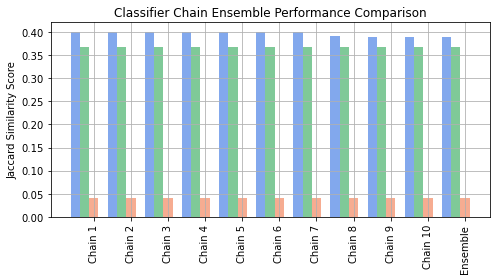

In [14]:
warnings.filterwarnings("ignore")
linear_svc_parameters = {"svc__tol": [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8], "svc__C": np.logspace(-2, 5, 10)}
model_scores = []
X_test = StandardScaler().fit(X_test).transform(X_test)

for label_index in range(Y_train.shape[1]):
    y_train = Y_train.iloc[:, label_index]
    y_test = Y_test.iloc[:, label_index]
    
    label_Encoder = LabelEncoder().fit(Y_LABEL[label_index])
    y_train = label_Encoder.transform(y_train)
    y_test = label_Encoder.transform(y_test)
    
    linear_std_svc = linear_std_SVC()
    grid_CV = GridSearchCV(linear_std_svc, linear_svc_parameters, cv=10, n_jobs=-1)
    grid_CV.fit(X_train, y_train)
    
    chains = [ClassifierChain(grid_CV.best_estimator_, order='random', random_state=2333) 
              for i in range(10)]
    
    for chain in chains:
        chain.fit(X_train, y_train.reshape(-1, 1))
    
    Y_pred_chains = np.array([chain.predict(X_test) 
                              for chain in chains])
    chain_jaccard_scores = [jaccard_score(y_test, Y_pred_chain >= .5,average='micro')
                            for Y_pred_chain in Y_pred_chains]

    Y_pred_ensemble = Y_pred_chains.mean(axis=0)
    ensemble_jaccard_score = jaccard_score(y_test,Y_pred_ensemble >= .5,average='micro')
    
    chain_jaccard_scores.append(ensemble_jaccard_score)
    model_scores.append(chain_jaccard_scores)

x_pos = np.arange(len(MODEL_NAMES))

fig, ax = plt.subplots(figsize=(7, 4))
ax.grid(True)
ax.set_title('Classifier Chain Ensemble Performance Comparison')
ax.set_xticks(x_pos)
ax.set_xticklabels(MODEL_NAMES, rotation='vertical')
ax.set_ylabel('Jaccard Similarity Score')
colors = ['#EE5A24', '#009432', '#0652DD']
for index in range(3):
    ax.bar(x_pos - 0.25 * index, model_scores[index], alpha=0.5, color=colors[index], width=0.25, label=LABELS_NAME[index])
plt.tight_layout()
plt.show()

### vi. Extra Practice: Research how confusion matrices, precision, recall, ROC, and AUC are defined for multi-label classification and compute them for the classifiers you trained in above.

In [15]:
def plot_confusion_matrix(y_true, y_pred, target_names, title=None):
    confusionMatrix = confusion_matrix(y_true, y_pred)
    precision, recall, _, _ = score(y_true, y_pred, average='macro')

    plt.figure(figsize=(8, 6))
    plt.imshow(confusionMatrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=88)
        plt.yticks(tick_marks, target_names)

    thresh = confusionMatrix.max() / 2
    for i, j in itertools.product(range(confusionMatrix.shape[0]),range(confusionMatrix.shape[1])):
        plt.text(j, i, "{:,}".format(confusionMatrix[i, j]),
                 horizontalalignment="center",
                 color="white" if confusionMatrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\nOverall Precision={:0.4f}; '
               'Overall Recall={:0.4f}'.format(precision, recall))
    plt.title(title)
    plt.show()

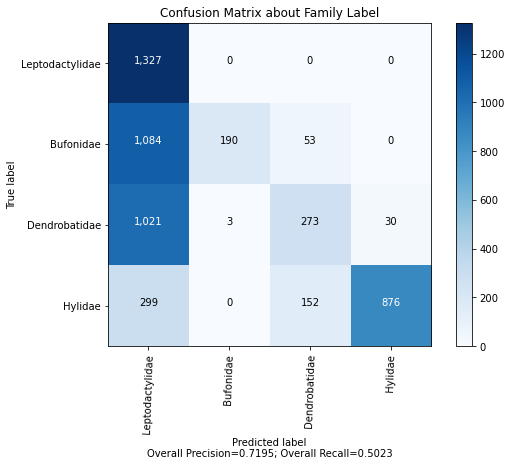

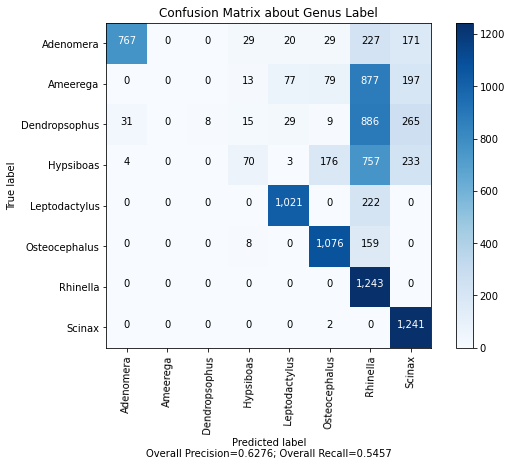

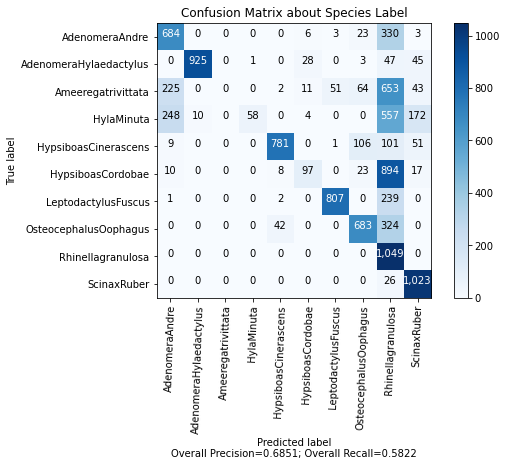

In [16]:
warnings.filterwarnings("ignore")
linear_svc_parameters = {"svc__tol": [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8], "svc__C": np.logspace(-2, 5, 10)}

for label_index in range(Y_train.shape[1]):
    y_train = Y_train.iloc[:, label_index]
    y_test = Y_test.iloc[:, label_index]
    
    smote = SMOTE(random_state=2333)
    X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)
    X_test_smote, y_test_smote = smote.fit_sample(X_test, y_test)
    
    linear_std_svc = linear_std_SVC()
    grid_CV = GridSearchCV(linear_std_svc, linear_svc_parameters, cv=10, n_jobs=-1)
    grid_CV.fit(X_train_smote, y_train_smote)
    
    best_Clf = grid_CV.best_estimator_
    y_predict = best_Clf.predict(X_test_smote)
    
    plot_confusion_matrix(y_test_smote, y_predict, target_names=Y_LABEL[label_index],
                          title='Confusion Matrix about {} Label'.format(LABELS_NAME[label_index]))

In [17]:
def plot_roc_curve(y_test, y_score, target_names, title):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(target_names)):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = ['#ffa502', '#16a085', '#ff4757', '#747d8c', 
              '#5352ed', '#2ed573', '#c0392b', '#8e44ad']
    for i, color in zip(range(len(target_names)), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1,
                 label='ROC of class {0} (area = {1:0.2f})'
                       ''.format(target_names[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

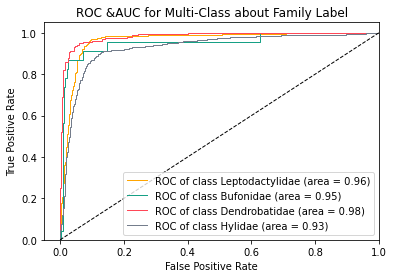

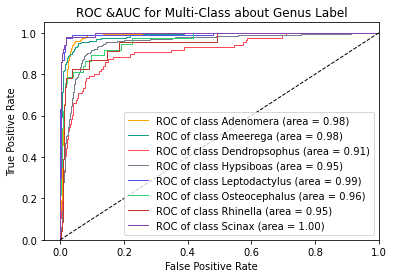

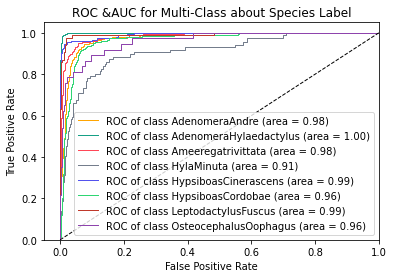

In [18]:
c = [2.1544, 77.4263, 77.4263]
tols = [1e-6, 0.0001, 0.0001]
for label_index in range(Y_train.shape[1]):
    y_train = Y_train.iloc[:, label_index]
    y_test = Y_test.iloc[:, label_index]
    
    y_train = label_binarize(y_train, classes=Y_LABEL[label_index])
    y_test = label_binarize(y_test, classes=Y_LABEL[label_index])

    classifier = OneVsRestClassifier(LinearSVC(penalty="l1", multi_class='ovr', dual=False, tol=tols[label_index],
                                               C=c[label_index]))
    y_score = classifier.fit(X_train, y_train).decision_function(X_test)

    plot_roc_curve(y_test, y_score, target_names=Y_LABEL[label_index],title='ROC &AUC for Multi-Class about {} Label'
                   .format(LABELS_NAME[label_index]))

## 5.2 K-Means Clustering on a Multi-Class and Multi-Label Data Set
## Monte-Carlo Simulation: Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from collections import Counter

### (a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k E {1, 2, ....., 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.

In [20]:
avg_scores = []
hamming_dist = []
k_list = []
for i in range(50):
    temp_avg_scores = []
    for k in range(2, 51):
        kmeans_clf = KMeans(n_clusters=k, random_state=i)
        cluster_labels = kmeans_clf.fit_predict(X_data)
        temp_avg_scores.append(silhouette_score(X_data, cluster_labels))
        hamming_dist.append(sum(np.min(cdist(X_data, kmeans_clf.cluster_centers_, 'euclidean'), axis=1)) / X_data.shape[0])
    temp_best_k = temp_avg_scores.index(max(temp_avg_scores)) + 2
    k_list.append(temp_best_k)
    avg_scores.append(max(temp_avg_scores))
    
print("-----------\"The best K\"-------------")
print("The Best K is : ", Counter(k_list).most_common(1)[0][0])
print("-----------\"Max Silhouette Score\"-------------")
print("Max Silhouette Score is : ", max(avg_scores))
print("-----------\"AVG Hamming Distance\"-------------")
print("The average of Hamming Distance is : ", np.average(hamming_dist))
print("-----------\"STD Hamming Distance\"-------------")
print("The standard deviation of Hamming Distance is : ", np.std(hamming_dist))

-----------"The best K"-------------
The Best K is :  4
-----------"Max Silhouette Score"-------------
Max Silhouette Score is :  0.38525558106940394
-----------"AVG Hamming Distance"-------------
The average of Hamming Distance is :  0.2906301371169735
-----------"STD Hamming Distance"-------------
The standard deviation of Hamming Distance is :  0.06556489991769904


### (b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

In [21]:
PREDICT_LABEL = 'predicted'

avg_scores = []
for i in range(1, 51):
    temp_avg_scores = []
    predicted_results = []
    for k in range(2, 51):
        kmeans_clf = KMeans(n_clusters=k, random_state=i)
        predicted_labels = kmeans_clf.fit_predict(X_data)
        predicted_results.append(predicted_labels)
        temp_avg_scores.append(silhouette_score(X_data, predicted_labels))
    temp_best_k = temp_avg_scores.index(max(temp_avg_scores)) + 2
    top_label = dict()
    y_data[PREDICT_LABEL] = predicted_results[np.argmax(temp_avg_scores)]
    
    for class_index in range(temp_best_k):
        same_label_data = y_data[y_data[PREDICT_LABEL] == class_index]
        temp = {}
        for column in LABELS_NAME:
            temp[column] = Counter(same_label_data[column]).most_common(1)[0][0]
        top_label[class_index] = temp

    print("In loop number {}, the best k is {}, and the majority class in each label is : {}"
          .format(i, temp_best_k, top_label))

In loop number 1, the best k is 4, and the majority class in each label is : {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 2: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens'}, 3: {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata'}}
In loop number 2, the best k is 4, and the majority class in each label is : {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 2: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 3: {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata'}}
In loop number 3, the best k is 4, and the majority class in each label is : {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens'},

In loop number 21, the best k is 4, and the majority class in each label is : {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 2: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens'}, 3: {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata'}}
In loop number 22, the best k is 4, and the majority class in each label is : {0: {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 2: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 3: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens'}}
In loop number 23, the best k is 4, and the majority class in each label is : {0: {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivitt

In loop number 41, the best k is 4, and the majority class in each label is : {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraAndre'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 2: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 3: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens'}}
In loop number 42, the best k is 4, and the majority class in each label is : {0: {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 2: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens'}, 3: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}}
In loop number 43, the best k is 4, and the majority class in each label is : {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHyla

### (c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.

In [ ]:
hamming_loss_list = list()
hamming_dist = list()
avg_scores = []
for i in range(1, 51):
    temp_avg_scores = []
    predicted_results = []
    for k in range(2, 51):
        kmeans_clf = KMeans(n_clusters=k, random_state=i)
        predicted_labels = kmeans_clf.fit_predict(X_data)
        predicted_results.append(predicted_labels)
        temp_avg_scores.append(silhouette_score(X_data, predicted_labels))
        hamming_dist.append(sum(np.min(cdist(X_data, kmeans_clf.cluster_centers_, 'euclidean'), axis=1)) / X_data.shape[0])
    temp_best_k = temp_avg_scores.index(max(temp_avg_scores)) + 2
    top_label = dict()
    y_data[PREDICT_LABEL] = predicted_results[np.argmax(temp_avg_scores)]
    
    for class_index in range(temp_best_k):
        matched_label_data = y_data[y_data[PREDICT_LABEL] == class_index]
        temp = {}
        for column in LABELS_NAME:
            temp[column] = Counter(matched_label_data[column]).most_common(1)[0][0]
        top_label[class_index] = temp
        
    unmatched = 0
    for class_index in range(temp_best_k):
        matched_label_data = y_data[y_data[PREDICT_LABEL] == class_index]
        for column in LABELS_NAME:
            unmatched += sum(matched_label_data[column] != top_label[class_index][column])
    hamming_loss = unmatched / (y_data.shape[0] * 3)
    hamming_loss_list.append(hamming_loss)
    
print("-----------\"Average Hamming Distance\"-------------")
print("The average of Hamming Distance is : ", np.average(hamming_dist))
print("-----------\"Average Hamming Score\"-------------")
print("The average of Hamming Score is : ", np.average(1 - np.array(hamming_loss_list)))
print("-----------\"Average Hamming Loss\"-------------")
print("The average of Hamming Loss is : ", np.average(hamming_loss_list))

## 5.3 ISLR 10.7.2 

(a)

In [ ]:
from scipy.cluster import hierarchy

y_dist = np.array([[0, 0.3, 0.4, 0.7], 
                   [0.3, 0, 0.5, 0.8], 
                   [0.4, 0.5, 0, 0.45], 
                   [0.7, 0.8, 0.45, 0]])
Z = hierarchy.linkage(y_dist, 'complete')
plt.figure()
dn = hierarchy.dendrogram(Z)

(b)

In [ ]:
Z = hierarchy.linkage(y_dist, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z)

(c) In this case, we have clusters (0,1) and (2,3).

(d) In this case, we have clusters ((0,1),2) and (3).

(e)

In [ ]:
Z = hierarchy.linkage(y_dist, 'complete')
plt.figure()
dn = hierarchy.dendrogram(Z, labels=[3,2,1,0])